<a href="https://colab.research.google.com/github/harishkumarkrr/Tensorflow2.0_DeepLearn/blob/master/MalariaCellDetectiontf2_0CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import json

In [0]:
# token={"username":"harishkumarkrr","key":"*******************236e920584e06e799a"}

In [0]:
# with open("kaggle.json", 'w') as file:
  # json.dump(token,file)

In [0]:
# !mkdir -p ~/.kaggle

In [0]:
# !cp kaggle.json /root/.kaggle/kaggle.json

In [0]:
# !kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [0]:
# !unzip cell-images-for-detecting-malaria.zip

In [0]:
# !pip install tensorflow==2.0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
img_height=64
img_width=64

In [0]:
imggenerator=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [68]:
train_data=imggenerator.flow_from_directory(directory="/content/cell_images/cell_images", target_size=(img_height,img_width),class_mode='binary',batch_size=16,subset="training")

Found 22048 images belonging to 2 classes.


imggenerator.flow_from_directory(directory="/content/cell_images/cell_images", target_size=(img_height,img_width),class_mode='binary',batch_size=16,subset="training")

In [69]:
validation_data=imggenerator.flow_from_directory(directory="/content/cell_images/cell_images", target_size=(img_height,img_width),class_mode='binary',batch_size=16,subset="validation")

Found 5510 images belonging to 2 classes.


In [70]:
predict_data=imggenerator.flow_from_directory(directory="/content/cell_images/cell_images", target_size=(img_height,img_width),class_mode='binary',batch_size=16,subset="validation")

Found 5510 images belonging to 2 classes.


In [0]:
model=Sequential()

model.add(Conv2D(16, (3,3), input_shape=(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
history=model.fit_generator(train_data,steps_per_epoch=len(train_data),epochs=5,validation_data=validation_data,validation_steps=len(validation_data))

Epoch 1/5
1378/1378 [==============================] - 29s 21ms/step - loss: 0.5364 - acc: 0.7379 - val_loss: 0.2741 - val_acc: 0.9143
Epoch 2/5
1378/1378 [==============================] - 28s 21ms/step - loss: 0.2355 - acc: 0.9279 - val_loss: 0.1961 - val_acc: 0.9390
Epoch 3/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.2042 - acc: 0.9373 - val_loss: 0.1871 - val_acc: 0.9341
Epoch 4/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1854 - acc: 0.9433 - val_loss: 0.1751 - val_acc: 0.9436
Epoch 5/5
1378/1378 [==============================] - 28s 20ms/step - loss: 0.1774 - acc: 0.9476 - val_loss: 0.1983 - val_acc: 0.9345


In [80]:
history.history

{'acc': [0.73789006, 0.92793, 0.9372732, 0.94326013, 0.94756895],
 'loss': [0.5363541811661381,
  0.23549693581581937,
  0.20416950997024644,
  0.18536449991016551,
  0.17744677634206865],
 'val_acc': [0.9143376, 0.93902, 0.93411976, 0.94355714, 0.93448275],
 'val_loss': [0.2740823553632135,
  0.19605732622785846,
  0.18708475686177828,
  0.1751243460383536,
  0.1982764116204951]}

In [0]:
def plot_image(epochs,history):
  epochs_range=range(1,epochs+1)
  plt.plot(epochs_range,history.history['acc'])
  plt.plot(epochs_range,history.history['val_acc'])
  plt.show()

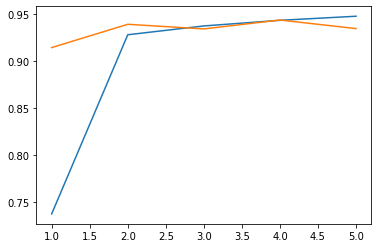

In [86]:
plot_image(5,history)